<a href="https://colab.research.google.com/github/sharonma1218/stats306/blob/main/week11_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
options(repr.plot.width=8, repr.plot.height=5, repl.plot.dpi=150)
theme_set(theme_classic())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Week 11 Readings 

## 18: Factors

### 18.2: Basics

* Categorical Variables: variables that have a fixed and known set of possible values.
  * Factors help create these values & are useful when you want to display character vectors in a non-alphabetical order
    * E.g. months, days of the week


In [ ]:
# Create a variable that records months:
x1<-c("Dec","Apr","Jan","Mar")
sort(x1)

[1] "Apr" "Dec" "Jan" "Mar"

In [ ]:
# Create the levels:
month_levels<-c("Jan","Feb","Mar","Apr","May","Jun",
                "Jul","Aug","Sep","Oct","Nov","Dec")

In [ ]:
# Create the factor: 
y1<-factor(x1,levels=month_levels)
y1

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [ ]:
# B/c any value that is not in the level is silently converted to NA, 
# you may want to use fct() instead b/c it will give you the error.

x2<-c("Dec","Apr","Jam","Mar")
y2<-factor(x2,levels=month_levels)
y2

# y2<-fct(x2,levels=month_levels)

[1] Dec  Apr  <NA> Mar 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

`factor(x1)` (no levels): output will be in alphabetical order.

`unique(x)` & `%>%fct_inorder()`: makes the order of the levels match the order of the first appearance in the data 

`levels(f2)`: prints out the level in its order 

### 18.3: GSS

When factors are stored in a tibble, you can't see their levels so easily. You can view them w/ `count()` or a bar chart: 



In [ ]:
gss_cat%>%
  count(race)

race,n
<fct>,<int>
Other,1959
Black,3129
White,16395


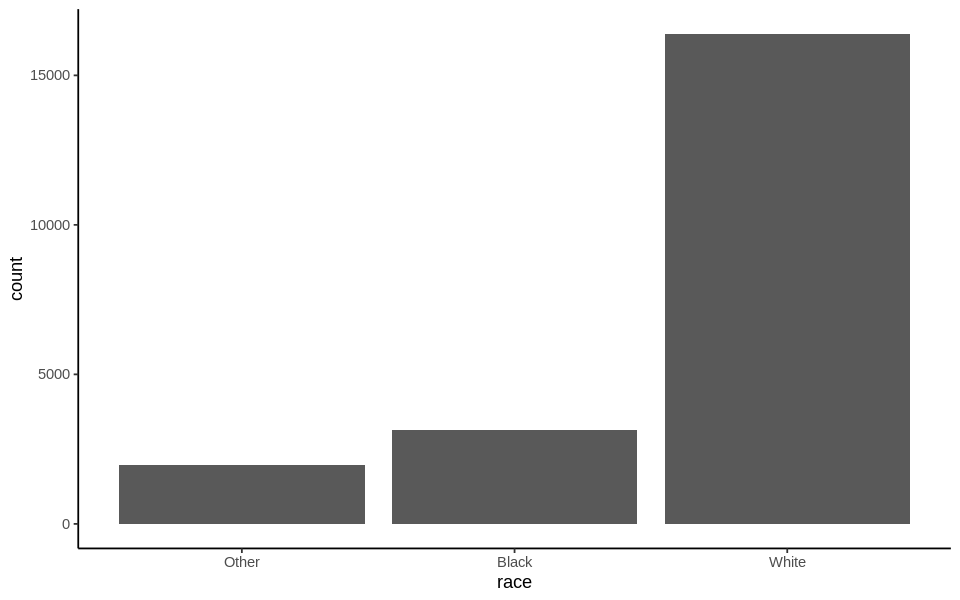

In [ ]:
ggplot(gss_cat,aes(x=race))+
  geom_bar()

### 18.4: Modifying Factor Order

In [ ]:
relig_summary<-gss_cat%>%
  group_by(relig)%>%
  summarize(age=mean(age,na.rm=T),
            tvhours=mean(tvhours,na.rm=T),
            n=n())

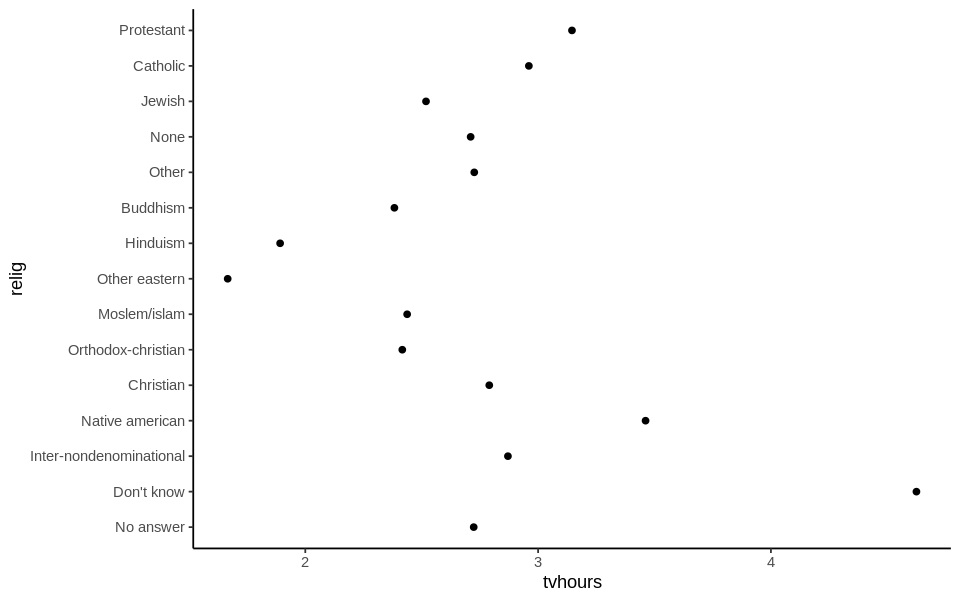

In [ ]:
# Orig Plot:
ggplot(relig_summary,aes(x=tvhours,y=relig))+
  geom_point()

It's often useful to change the order of the factor levels in a visualization b/c it's easier to pick up patterns (e.g. the group that watched the least amt of TV vs most). 

`fct_reorder()` arguments:
1. f: the factor whose levels you want to modify
2. x: a numeric vector that you want to use to reorder the levels
3. fun: (opt) a function that's used if there are multiple values of x for each value of f 


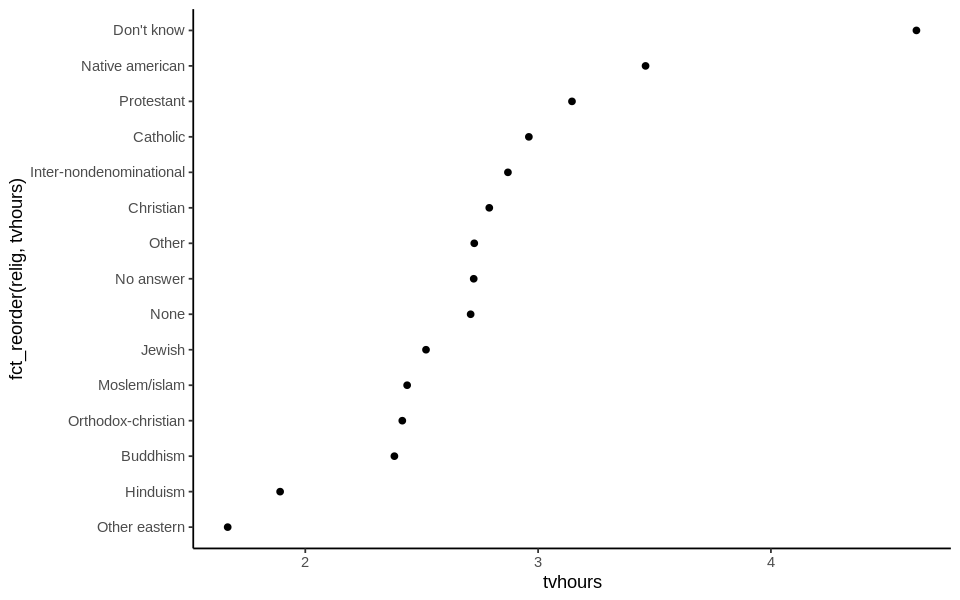

In [ ]:
# Reordered Plot:
ggplot(relig_summary,aes(x=tvhours,y=fct_reorder(relig,tvhours)))+
  geom_point()

fct_reorder2(f,x,y): reorders the factor f by the y values associated w/ the largest x values so that the colors of the lines at the far right of the plot will line up with the legend 

In [ ]:
by_age<-gss_cat%>%
  filter(!is.na(age))%>%
  count(age,marital)%>%
  group_by(age)%>%
  mutate(prop=n/sum(n))

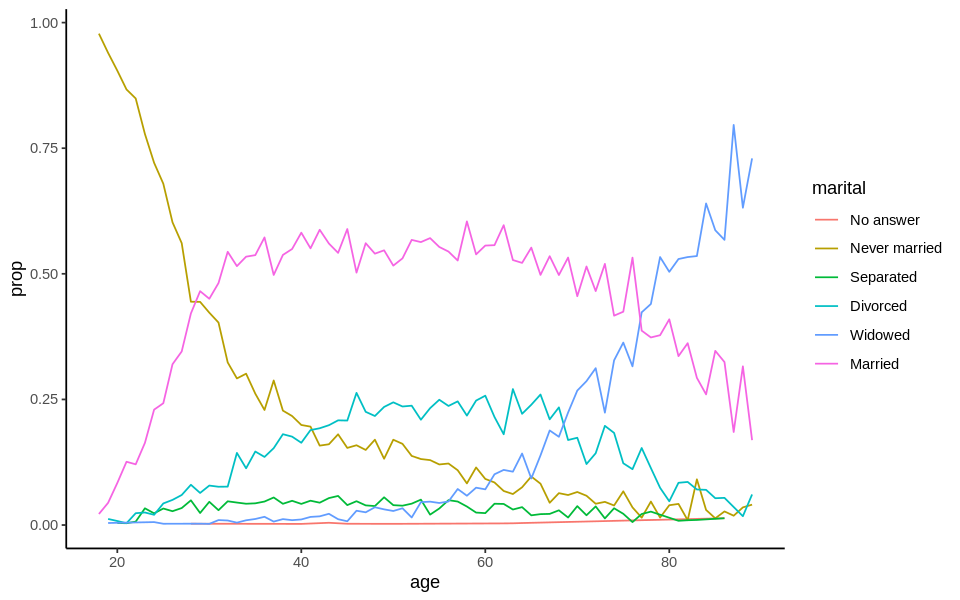

In [ ]:
# Orig Legend/Colors:
ggplot(by_age,aes(x=age,y=prop,color=marital))+
  geom_line(na.rm=T)

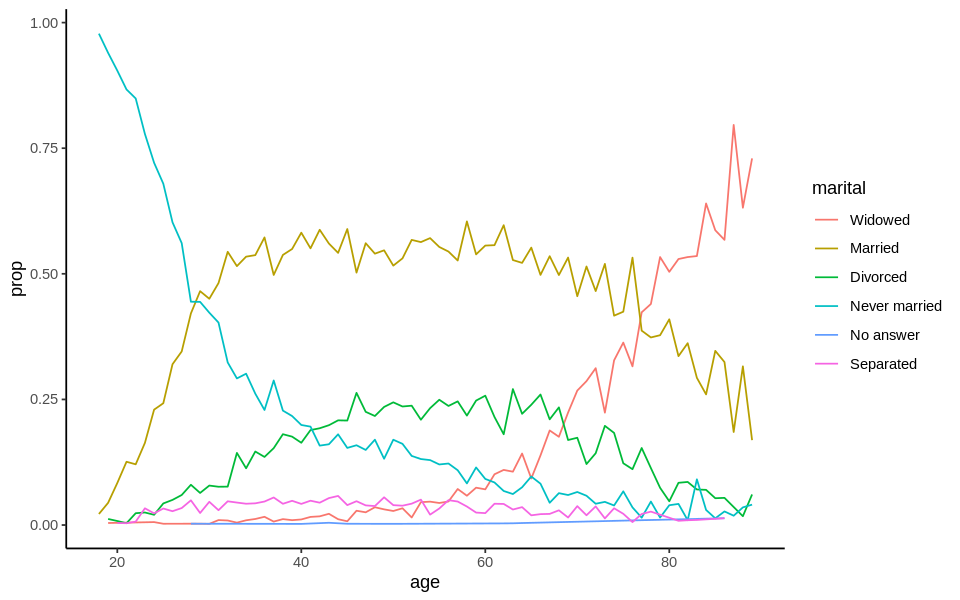

In [ ]:
# New Legend/Colors:
ggplot(by_age,aes(x=age,y=prop,color=fct_reorder2(marital,age,prop)))+
  geom_line()+
  labs(color="marital")

`fct_recode()`: allows you to recode the value of each level

`fct_relevel()`: moves any number of levels (rows) to the front of the line

`fct_infreq()`: orders bar plots in decreasing frequency

## 19: Lubridate

In [3]:
install.packages('lubridate')
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(lubridate)
library(nycflights13)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 19.2: Creating Dates/Times

In [5]:
today() # prints the current date in YYYY-MM-DD format

[1] "2023-03-15"

In [6]:
now() # prints the current date AND time AND timezone 

[1] "2023-03-15 01:13:56 UTC"

4 reasons you'd create date/time data:

1. while reading a file with readr

2. from a string

3. from individual date-time components

4. from an existing date/time object



If your CSV file contains an ISO8601* date or date-time, readr will automatically recognize it. 

*international standard for writing dates: YYYY-MM-DD [T or space] HH:MM:SS. So 2022:05:03 16:26 or 2022-05-03T16:26 

For other date-time formats, you need to use `col_types=(cols(date=col_date("%m/%d/%y")))`, or some variation of this. 

In [7]:
csv<-"
  date
  01/02/15"

read_csv(csv,col_types=cols(date=col_date("%m/%d/%y")))

date
<date>
2015-01-02


**From strings:**

* `ymd()`: creates dates
* `ymd_hms()`: creates date-times

**From individual components:**

* `make_date()`: creates dates 
* `make_datetime()`: creates date-times

In [27]:
# Flights Ex:
flights%>%
  select(year,month,day,hour,minute)%>%
    mutate(departure=make_datetime(year,month,day,hour,minute))%>%
    head

year,month,day,hour,minute,departure
<int>,<int>,<int>,<dbl>,<dbl>,<dttm>
2013,1,1,5,15,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:40:00
2013,1,1,5,45,2013-01-01 05:45:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,5,58,2013-01-01 05:58:00


In [36]:
# The times are in an odd format, so 
# we pull out the hour and minute components w/ arithmetic:

make_datetime_100<-function(year,month,day,time){
  make_datetime(year,month,day,time%/%100,time%%100)
}

flights_dt<-flights%>%
  filter(!is.na(dep_time),!is.na(arr_time))%>%
  mutate(
  dep_time=make_datetime_100(year,month,day,dep_time),
  arr_time=make_datetime_100(year,month,day,arr_time),
  sched_dep_time=make_datetime_100(year,month,day,sched_dep_time),
  sched_arr_time=make_datetime_100(year,month,day,sched_arr_time)
  )%>%
    select(origin,dest,ends_with("delay"),ends_with("time"))
  
flights_dt%>%head

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150


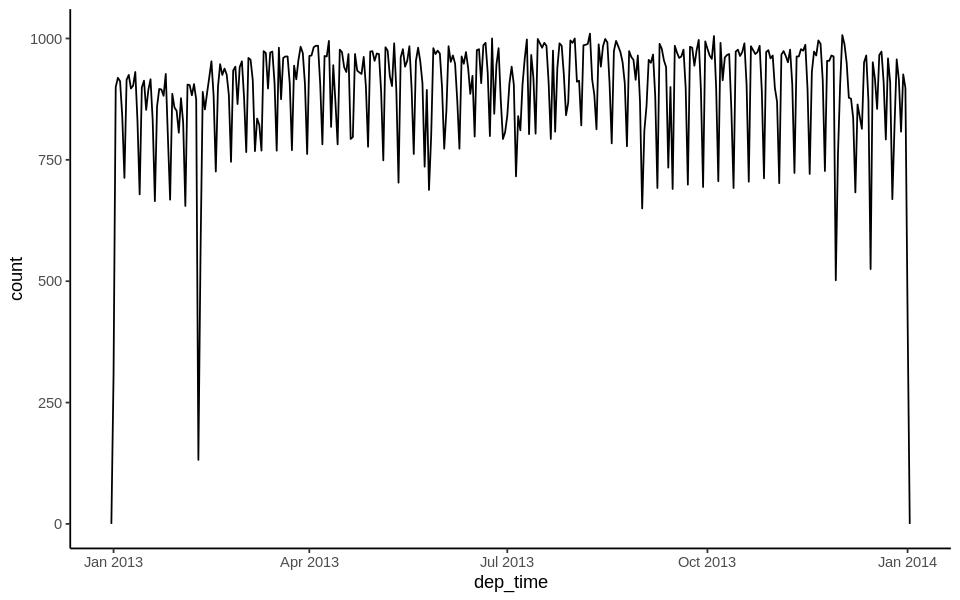

In [37]:
# Distribution of dept times across the yr:
flights_dt%>%
  ggplot(aes(x=dep_time))+
  geom_freqpoly(binwidth=86400) # 86400 seconds = 1 day

* `as_datetime()`: allows you to switch to date-time

* `as_date()`: allows you to switch to date

In [38]:
ymd(c("2010-10-10","bananas"))

Warning message:
“ 1 failed to parse.”


[1] "2010-10-10" NA

In [40]:
today(tzone="EST")

[1] "2023-03-14"

**Getting components:** 

* year(vector)
* month()
* mday(): day of the month
* yday(): day of the year 
* wday(): day of the week
* hour()
* minute()
* second()

**Time Spans:** 

* Durations: exact number of seconds b/w two points
* Periods: approx weeks or months b/w two points
* Intervals: the starting and end points 


`as.duration(h_age)`: measures duration

In [49]:
# Durations:

# Manual:
h_age<-today()-ymd("1979-10-14")
h_age

# Auto:
as.duration(h_age)
43.42*365 # output * 365

Time difference of 15858 days

[1] "1370131200s (~43.42 years)"

[1] 15848.3

In [52]:
# Periods:
# Overnight Flights:
flights_dt%>%
  mutate(
    overnight=arr_time<dep_time,
    arr_time=arr_time+days(if_else(overnight,0,1)),
    sched_arr_time=sched_arr_time+days(overnight*1)
  )%>%
    head

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,overnight
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<lgl>
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-02 08:30:00,2013-01-01 08:19:00,227,FALSE
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-02 08:50:00,2013-01-01 08:30:00,227,FALSE
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-02 09:23:00,2013-01-01 08:50:00,160,FALSE
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-02 10:04:00,2013-01-01 10:22:00,183,FALSE
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-02 08:12:00,2013-01-01 08:37:00,116,FALSE
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-02 07:40:00,2013-01-01 07:28:00,150,FALSE


In [55]:
# Intervals: 

# Creating an interval:
y2023<-ymd("2023-01-01")%--%ymd("2024-01-01") # tz/tzone="America/New_York"
y2023

# Finding num of days in interval:
y2023/days(1)

[1] 2023-01-01 UTC--2024-01-01 UTC

[1] 365